In [1]:
import sys
sys.path.insert(0,'/home/kriti/caffe/python')
import caffe

In [2]:
from __future__ import division, print_function
import caffe
import numpy as np
import os

DATA_DIR = ""
OUTPUT_DIR = os.path.join(DATA_DIR, "output")

In [3]:
caffe.set_mode_cpu()

In [4]:
CAFFE_HOME="/home/kriti/caffe"
cur_path = os.path.dirname(os.path.realpath('__file__'))
MODEL_DIR = os.path.join(cur_path)
MODEL_PROTO = os.path.join(MODEL_DIR, "deploy.prototxt")
MODEL_WEIGHTS = os.path.join(MODEL_DIR, "vgg_siamese.caffemodel")
MEAN_IMAGE = os.path.join(MODEL_DIR, "VGG_mean.binaryproto")

In [5]:
print (cur_path)
net = caffe.Net(MODEL_PROTO, MODEL_WEIGHTS, caffe.TEST)

/home/kriti/Documents/cogs_260/final_project


In [7]:
# layer names and output shapes
for layer_name, blob in net.blobs.iteritems():
    print(layer_name, blob.data.shape)

# write out weight matrices and bias vectors
for k, v in net.params.items():
    print(k, v[0].data.shape, v[1].data.shape)
    np.save(os.path.join(OUTPUT_DIR, "W_{:s}.npy".format(k)), v[0].data)
    np.save(os.path.join(OUTPUT_DIR, "b_{:s}.npy".format(k)), v[1].data)

# write out mean image
# blob = caffe.proto.caffe_pb2.BlobProto()
# with open(MEAN_IMAGE, 'rb') as fmean:
#     mean_data = fmean.read()
# blob.ParseFromString(mean_data)
# mu = np.array(caffe.io.blobproto_to_array(blob))
# print("Mean image:", mu.shape)
# np.save(os.path.join(OUTPUT_DIR, "mean_image.npy"), mu)


data (1, 6, 224, 224)
data_0 (1, 3, 224, 224)
data_1 (1, 3, 224, 224)
conv1_1_0 (1, 64, 224, 224)
conv1_2_0 (1, 64, 224, 224)
pool1_0 (1, 64, 112, 112)
conv2_1_0 (1, 128, 112, 112)
conv2_2_0 (1, 128, 112, 112)
pool2_0 (1, 128, 56, 56)
conv3_1_0 (1, 256, 56, 56)
conv3_2_0 (1, 256, 56, 56)
conv3_3_0 (1, 256, 56, 56)
pool3_0 (1, 256, 28, 28)
conv4_1_0 (1, 512, 28, 28)
conv4_2_0 (1, 512, 28, 28)
conv4_3_0 (1, 512, 28, 28)
pool4_0 (1, 512, 14, 14)
conv5_1_0 (1, 512, 14, 14)
conv5_2_0 (1, 512, 14, 14)
conv5_3_0 (1, 512, 14, 14)
pool5_0 (1, 512, 7, 7)
fc6_0 (1, 4096)
fc7_0 (1, 4096)
conv1_1_1 (1, 64, 224, 224)
conv1_2_1 (1, 64, 224, 224)
pool1_1 (1, 64, 112, 112)
conv2_1_1 (1, 128, 112, 112)
conv2_2_1 (1, 128, 112, 112)
pool2_1 (1, 128, 56, 56)
conv3_1_1 (1, 256, 56, 56)
conv3_2_1 (1, 256, 56, 56)
conv3_3_1 (1, 256, 56, 56)
pool3_1 (1, 256, 28, 28)
conv4_1_1 (1, 512, 28, 28)
conv4_2_1 (1, 512, 28, 28)
conv4_3_1 (1, 512, 28, 28)
pool4_1 (1, 512, 14, 14)
conv5_1_1 (1, 512, 14, 14)
conv5_2_1 (1,

(6, 224, 224)


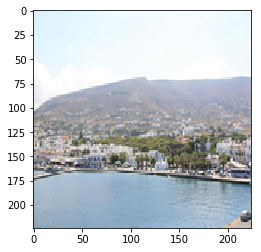

In [11]:
from skimage.io import imread
from PIL import Image
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

def resize_img(file1):
    size = 224
    data = Image.open(file1)#.convert('L')
    data.thumbnail((size,size), Image.ANTIALIAS)
    img = data.resize((size,size))
    plt.imshow(img)
    testfile = "test.jpg"
    scipy.misc.imsave(testfile, img)
    img = scipy.misc.imread(testfile, mode = "RGB")
    img = img.reshape(3,224,224)*1.
    return img

def gen_input(file1,file2):
       
    img1 = resize_img(file1)
    img2 = resize_img(file2)
    img = np.concatenate((img1,img2))
    img = (img*1.0)/255.0
    print(img.shape)
#     print(img)
    return img

img = gen_input('backup/Dataset/train_val_imgs/000001-03.JPG','backup/Dataset/train_val_imgs/000001-04.JPG')

In [12]:
# net.blobs['data'].reshape(1, img2.shape[0], img2.shape[1], img2.shape[2])
# transformer = caffe.io.Transformer({'data': (1, img.shape[0], img.shape[1], img.shape[2])})
# transformer.set_transpose('data', (0, 1, 2)) # To reshape from (H, W, C) to (C, H, W) ...
# transformer.set_raw_scale('data', 1/255.)
net.blobs['data'].data[...] = img#net.blobs['data'].reshape(1, img.shape[0], img.shape[1], img.shape[2])
#transformer.preprocess('data', img)  

In [13]:
res = net.forward()
prob = res
print(prob)

{'prob': array([[ 0.47953433,  0.52046567]], dtype=float32)}


In [ ]:
path = ['Dataset/train_val_imgs']
for p in path:
    for files in listdir(p):
#         print(files)
        try:
            t = load_image(p+'/'+files)
            X = t
            Y = (float(path.index(p)))
            data.append((X,Y,p+'/'+files))
        except:
            print("error reading file:"+ files)